In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import random
from bitarray import bitarray
from bitarray.util import int2ba, ba2int

In [2]:
random.seed(15)
np.random.seed(15)

$$
f\left(x_{1}, x_{2}\right)=\sin \left(10 x_{1}\right)+x_{1} \cos \left(2 \pi x_{2}\right)
$$

$$
x_{1} \in[-2,2], x_{2} \in[0,1]
$$

$$f \to min $$

### Minimization based on binary individuals

## GA for single dimension minimization

In [3]:
def plot(f, a, b, x_min=None, delta=0.01):
  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot()

  x = np.arange(a, b, (b-a)*delta)
  
  ax.plot(x, f(x), label='$f(x)$')
  if(x_min != None):
    f_min = f(x_min)
    ax.plot([x_min],[f_min], 'r*', label=r'$f(x) = min $')
    display(Math(
      r'x^*={},\\ f(x^*)={}'
      .format(x_min, f(x_min))
    ))

  plt.ylabel('y')
  plt.xlabel('x')
  plt.legend()
  plt.grid()

### Transformation

In [4]:
def M(x):
  #return (x_interval[1] - x_interval[0]) / (2**n - 1) * ba2int(x) + x_interval[0]
  #return h_x * ba2int(x) + x_interval[0]
  d = 0
  for i, b in enumerate(x):
    if b:
      d += 2 ** i

  return (x_interval[1] - x_interval[0]) / (2 ** n - 1) * d + x_interval[0]

### Evaluation

In [5]:
def evaluate(x):
  return f(M(x))

In [6]:
def bestOfPopulationt(population):
  scores = [evaluate(x) for x in population]
  
  best_index = np.argmin(scores)
  
  return population[best_index], scores[best_index]

### Modification

In [7]:
def mutate(x):
  index = np.random.randint(n)
  
  mutated = x.copy()
  mutated[index] = not mutated[index]
  
  return mutated

In [8]:
def crossbreed(mom, dad):
  index = np.random.randint(n)
  
  return (mom[:index] + dad[index:], dad[:index] + mom[index:])

### Selection

In [9]:
def cultivateFrom(population: list):
  new_population = []
  N = len(population)
  
  for _ in range(N//2):

    mom = roundOfTournament(population)
    dad = roundOfTournament(population)

    if shouldMutate():
      mom = mutate(mom)

    if shouldMutate():
      dad = mutate(dad)

    if shouldCross():
      mom, dad = crossbreed(mom, dad)

    new_population.append(mom)
    new_population.append(dad)

  return new_population

def roundOfTournament(population: list):
  participants = random.sample(population, N_t)
  
  winner, _ = bestOfPopulationt(participants)

  return winner

def shouldMutate():
  return np.random.choice([True, False], p=[p_mutate, 1 - p_mutate])

def shouldCross():
  return np.random.choice([True, False], p=[p_cross, 1 - p_cross])

### Problem

In [10]:
# problem definition
f = lambda x: x*np.sin(10*np.pi*x) + 1

x_interval = [-1, 2]

In [11]:
h_x = 1e-6

n = len(int2ba(int((x_interval[1] - x_interval[0])/h_x)))
n

22

In [12]:
# GA parameters
N = 100
max_iterations = 30
max_iterations_without_evolution = 10
p_mutate = 0.9
p_cross = 0.5
N_t = 3

### GA

In [13]:
population = [bitarray(n) for _ in range(N)]
iterations_without_evolution = 0
best_from_populations = []
scores = []
best_score = bestOfPopulationt(population)

for i in range(max_iterations):

  best, population_score = bestOfPopulationt(population)
  
  best_from_populations.append(best)
  scores.append(population_score)
  
  population = cultivateFrom(population)

  
all_time_best, minimum = bestOfPopulationt(best_from_populations)

(all_time_best, minimum)

(bitarray('1010001110001111011111'), -0.9502597341194818)

<IPython.core.display.Math object>

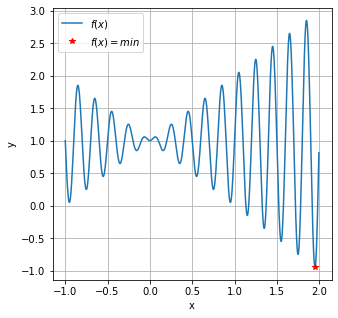

In [14]:
plot(f, x_interval[0], x_interval[1], M(all_time_best), delta=1e-3)

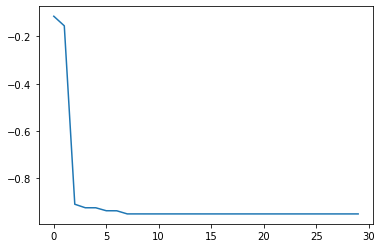

In [15]:
plt.plot([i for i in range(len(scores))],scores)